## Descrizione del dataset

Il dataset contiene le registrazioni dei viaggi in taxi effettuati a New York City in un periodo che va dal INIZIO al FINE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

taxi_df = pd.read_csv('data.csv')
taxi_df.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_748\1715113487.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_df = pd.read_csv('data.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [2]:
taxi_df.isnull().sum()
#taxi_df.count()
num_records = len(taxi_df)
print(f"Number of records in the dataframe: {num_records}")

Number of records in the dataframe: 6405008


Sostituisco valori nulli

In [3]:
taxi_df['payment_type'] = taxi_df['payment_type'].fillna(5.0)
taxi_df['RatecodeID'] = taxi_df['RatecodeID'].fillna(99.0)
taxi_df['VendorID'] = taxi_df['VendorID'].fillna(99.0)

In [4]:
taxi_df.drop(columns=['store_and_fwd_flag'], inplace=True)

In [5]:
taxi_df = taxi_df[(taxi_df['passenger_count'] > 0) &
              (taxi_df['trip_distance'] >= 0) &
              (taxi_df['fare_amount'] >= 0) &
              (taxi_df['extra'] >= 0) &
              (taxi_df['mta_tax'] >= 0) &
              (taxi_df['tip_amount'] >= 0) &
              (taxi_df['tolls_amount'] >= 0) &
              (taxi_df['improvement_surcharge'] >= 0) &
              (taxi_df['congestion_surcharge'] >= 0) &
               (taxi_df['tpep_dropoff_datetime'] > taxi_df['tpep_pickup_datetime']) ].copy()

taxi_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [6]:
taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


Agggiungiamo colonne di interesse

In [7]:
# Convert pickup and dropoff columns to datetime
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
# Calculate trip duration in minutes
taxi_df['trip_duration'] = (taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Calculating fare per mile for a better analysis
taxi_df['fare_per_mile'] = np.where(taxi_df['trip_distance'] != 0, taxi_df['total_amount'] / taxi_df['trip_distance'], 0)

Impostare categorie

In [8]:
# Convert specific columns to categorical
taxi_df['VendorID'] = taxi_df['VendorID'].astype('category')
taxi_df['payment_type'] = taxi_df['payment_type'].astype('category')
taxi_df['RatecodeID'] = taxi_df['RatecodeID'].astype('category')
taxi_df['tpep_pickup_datetime'] = taxi_df['tpep_pickup_datetime'].astype('category')
taxi_df['tpep_dropoff_datetime'] = taxi_df['tpep_dropoff_datetime'].astype('category')

Aggiunta informazioni zone taxi

Attributi aggiunti:

Borough

Zone

service_zone

In [9]:
zone_lookup = pd.read_csv("taxi_zone_lookup.csv")

taxi_df = taxi_df.merge(zone_lookup, how='left', left_on='PULocationID', right_on='LocationID')
taxi_df.drop(columns=['LocationID'], inplace=True)
# Cambia il nome di più colonne
taxi_df.rename(columns={'Borough': 'PickupLocationBorough', 'Zone': 'PickupLocationZone','service_zone': 'PickupLocationservice_zone'}, inplace=True)
taxi_df['PickupLocationBorough'] = taxi_df['PickupLocationBorough'].astype('category')
taxi_df['PickupLocationZone'] = taxi_df['PickupLocationZone'].astype('category')
taxi_df['PickupLocationservice_zone'] = taxi_df['PickupLocationservice_zone'].astype('category')

taxi_df = taxi_df.merge(zone_lookup, how='left', left_on='DOLocationID', right_on='LocationID')
taxi_df.drop(columns=['LocationID'], inplace=True)
# Cambia il nome di più colonne
taxi_df.rename(columns={'Borough': 'DropoffLocationBorough', 'Zone': 'DropoffLocationZone','service_zone': 'DropoffLocationservice_zone'}, inplace=True)
taxi_df['DropoffLocationBorough'] = taxi_df['DropoffLocationBorough'].astype('category')
taxi_df['DropoffLocationZone'] = taxi_df['DropoffLocationZone'].astype('category')
taxi_df['DropoffLocationservice_zone'] = taxi_df['DropoffLocationservice_zone'].astype('category')


Aggiunta informazioni Payment type, RatecodeID, VendorID

Attributi aggiunti:
Payment_name
Ratecode_name
Vendor_name

In [10]:
payment = pd.read_csv("payment.csv")
ratecode = pd.read_csv("ratecode.csv")
vendor = pd.read_csv("vendor.csv")
taxi_df = taxi_df.merge(payment, how='left', left_on='payment_type', right_on='Payment')
taxi_df = taxi_df.merge(ratecode, how='left', left_on='RatecodeID', right_on='Ratecode')
taxi_df = taxi_df.merge(vendor, how='left', left_on='VendorID', right_on='Vendor')

taxi_df.drop(columns=['payment_type','Payment','RatecodeID','Ratecode','VendorID','Vendor'], inplace=True)
taxi_df['Payment_name'] = taxi_df['Payment_name'].astype('category')
taxi_df['Ratecode_name'] = taxi_df['Ratecode_name'].astype('category')
taxi_df['Vendor_name'] = taxi_df['Vendor_name'].astype('category')

taxi_df.iloc[200]

tpep_pickup_datetime               2020-01-01 00:53:40
tpep_dropoff_datetime              2020-01-01 01:08:02
passenger_count                                    1.0
trip_distance                                     2.32
PULocationID                                       114
DOLocationID                                        45
fare_amount                                       11.0
extra                                              0.5
mta_tax                                            0.5
tip_amount                                        2.96
tolls_amount                                       0.0
improvement_surcharge                              0.3
total_amount                                     17.76
congestion_surcharge                               2.5
trip_duration                                14.366667
fare_per_mile                                 7.655172
PickupLocationBorough                        Manhattan
PickupLocationZone             Greenwich Village South
PickupLoca

## Dataset Describe

In [11]:
taxi_df[['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount','trip_duration','fare_per_mile']].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,trip_duration,fare_per_mile
count,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06,6.201937e+06
mean,1.543611e+00,2.856710e+00,1.257619e+01,1.073969e+00,4.968950e-01,2.220879e+00,3.369781e-01,2.998385e-01,2.313043e+00,1.858578e+01,1.591123e+01,1.256557e+01
std,1.144155e+00,3.759979e+00,1.183121e+01,1.239230e+00,3.938871e-02,2.761867e+00,1.750244e+00,6.957991e-03,6.575971e-01,1.448912e+01,6.407819e+01,1.100558e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02,0.000000e+00
25%,1.000000e+00,9.600000e-01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,2.500000e+00,1.116000e+01,6.366667e+00,6.246418e+00
50%,1.000000e+00,1.600000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,2.500000e+00,1.416000e+01,1.043333e+01,8.645833e+00
75%,2.000000e+00,2.900000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,2.500000e+00,1.956000e+01,1.668333e+01,1.179167e+01
max,9.000000e+00,2.628800e+02,4.265000e+03,1.130100e+02,3.300000e+00,1.100000e+03,9.105000e+02,3.000000e-01,2.750000e+00,4.268300e+03,8.525117e+03,2.128000e+04


# 2. Interpretazione specifica delle colonne
## passenger_count
- **Media (1.54)**: In media, i viaggi hanno tra 1 e 2 passeggeri.
- **Std (1.14)**: La deviazione standard suggerisce che il numero di passeggeri varia, ma è principalmente vicino a 1 o 2.
## trip_distance
- **Media (2.85 miglia)**: La maggior parte dei viaggi è breve.
- **Std (3.76 miglia)**: C'è una grande variabilità, con viaggi molto più lunghi (probabilmente outlier).
## fare_amount
- **Media (12.57 dollari)**: La tariffa media è relativamente bassa.
- **Std (11.83 dollari)**: Alcuni viaggi hanno tariffe molto più alte, indicando probabilmente viaggi lunghi o condizioni speciali.
## tip_amount
- **Media (2.22 dollari)**: La mancia media è intorno a 2 dollari.
- **Std (2.76 dollari)**: Ci sono differenze significative, con alcuni passeggeri che lasciano mance molto alte e altri molto basse o nulle.
## total_amount
- **Media (18.58 dollari)**: Questo include tutte le componenti del costo (tariffa base, mance, tasse, pedaggi, ecc.).
- **Std (14.49 dollari)**: C'è una grande variabilità nei costi totali dei viaggi.
## trip_duration
- **Media (15.91 minuti)**: La durata media dei viaggi è circa un quarto d'ora.
- **Std (64.08 minuti)**: L'elevata deviazione standard suggerisce che ci sono alcuni viaggi eccezionalmente lunghi, probabilmente outlier.
## fare_per_mile
- **Media (12.56 dollari per miglio)**: Questo valore sembra elevato e potrebbe indicare problemi nei dati (es., errori di registrazione o casi particolari).
- **Std (110.05)**: L'enorme deviazione standard suggerisce che i valori sono molto dispersi, con viaggi estremamente costosi per miglio.

In [12]:
num_records = len(taxi_df)
print(f"Number of records in the dataframe: {num_records}")

# Calcolo dei quartili
trip_distance_Q1 = taxi_df['trip_distance'].quantile(0.25)
trip_distance_Q3 = taxi_df['trip_distance'].quantile(0.75)
trip_distance_IQR = trip_distance_Q3 - trip_distance_Q1

# Soglie per identificare gli outlier
trip_distance_lower_bound = trip_distance_Q1 - 1.5 * trip_distance_IQR
trip_distance_upper_bound = trip_distance_Q3 + 1.5 * trip_distance_IQR

print(f"Soglia inferiore trip_distance: {trip_distance_lower_bound}")
print(f"Soglia superiore trip_distance: {trip_distance_upper_bound}")

# Calcolo dei quartili
trip_duration_Q1 = taxi_df['trip_duration'].quantile(0.25)
trip_duration_Q3 = taxi_df['trip_duration'].quantile(0.75)
trip_duration_IQR = trip_duration_Q3 - trip_duration_Q1

# Soglie per identificare gli outlier
trip_duration_lower_bound = trip_duration_Q1 - 1.5 * trip_duration_IQR
trip_duration_upper_bound = trip_duration_Q3 + 1.5 * trip_duration_IQR

print(f"Soglia inferiore trip_duration: {trip_duration_lower_bound}")
print(f"Soglia superiore trip_duration: {trip_duration_upper_bound}")

# Calcolo dei quartili
total_amount_Q1 = taxi_df['total_amount'].quantile(0.25)
total_amount_Q3 = taxi_df['total_amount'].quantile(0.75)
total_amount_IQR = total_amount_Q3 - total_amount_Q1

# Soglie per identificare gli outlier
total_amount_lower_bound = total_amount_Q1 - 1.5 * total_amount_IQR
total_amount_upper_bound = total_amount_Q3 + 1.5 * total_amount_IQR

print(f"Soglia inferiore total_amount: {total_amount_lower_bound}")
print(f"Soglia superiore total_amount: {total_amount_upper_bound}")

# Calcolo dei quartili
tip_amount_Q1 = taxi_df['tip_amount'].quantile(0.25)
tip_amount_Q3 = taxi_df['tip_amount'].quantile(0.75)
tip_amount_IQR = tip_amount_Q3 - tip_amount_Q1

# Soglie per identificare gli outlier
tip_amount_lower_bound = tip_amount_Q1 - 1.5 * tip_amount_IQR
tip_amount_upper_bound = tip_amount_Q3 + 1.5 * tip_amount_IQR

print(f"Soglia inferiore tip_amount: {tip_amount_lower_bound}")
print(f"Soglia superiore tip_amount: {tip_amount_upper_bound}")

# Rimozione degli outlier
taxi_df = taxi_df[(taxi_df['trip_distance'] <= trip_distance_upper_bound) &
                  (taxi_df['trip_duration'] <= trip_duration_upper_bound)&
                  (taxi_df['total_amount'] <= trip_duration_upper_bound)&
                  (taxi_df['tip_amount'] <= trip_duration_upper_bound)].copy()

num_records = len(taxi_df)
print(f"Number of records in the dataframe: {num_records}")

Number of records in the dataframe: 6201937
Soglia inferiore trip_distance: -1.9500000000000002
Soglia superiore trip_distance: 5.8100000000000005
Soglia inferiore trip_duration: -9.108333333333334
Soglia superiore trip_duration: 32.15833333333333
Soglia inferiore total_amount: -1.4399999999999977
Soglia superiore total_amount: 32.16
Soglia inferiore tip_amount: -4.29
Soglia superiore tip_amount: 7.15
Number of records in the dataframe: 5413365


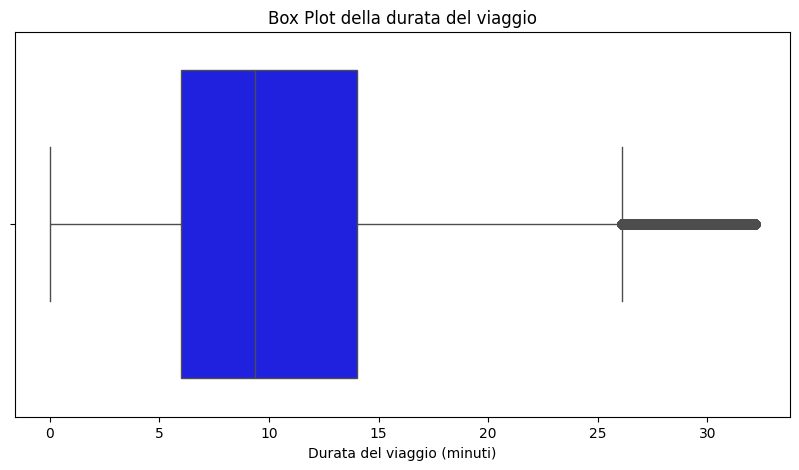

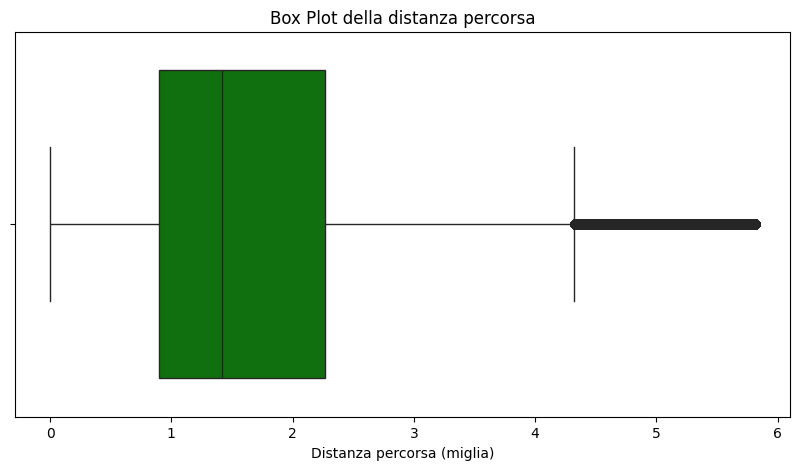

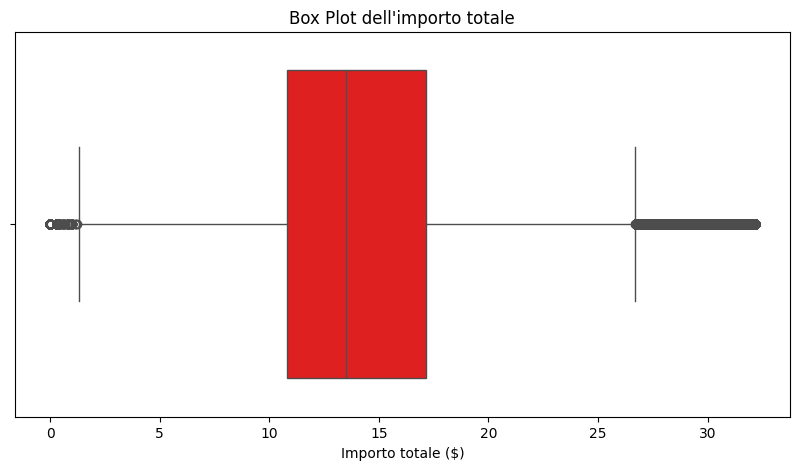

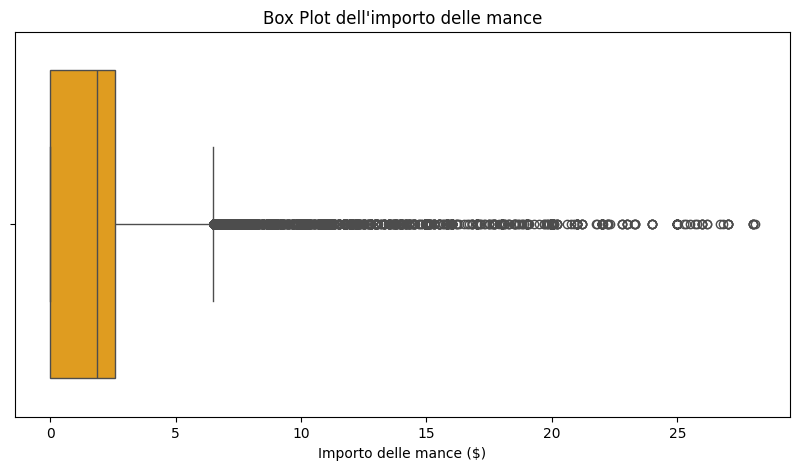

In [13]:
# Create a box plot for tip_amount
plt.figure(figsize=(10, 5))
sns.boxplot(x=taxi_df['trip_duration'],color='blue')
plt.xlabel('Durata del viaggio (minuti)')
plt.title('Box Plot della durata del viaggio')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=taxi_df['trip_distance'],color='green')
plt.xlabel('Distanza percorsa (miglia)')
plt.title('Box Plot della distanza percorsa')
plt.show()

# Create a box plot for total_amount
plt.figure(figsize=(10, 5))
sns.boxplot(x=taxi_df['total_amount'],color='red')
plt.xlabel('Importo totale ($)')
plt.title('Box Plot dell\'importo totale')
plt.show()

# Create a box plot for tip_amount
plt.figure(figsize=(10, 5))
sns.boxplot(x=taxi_df['tip_amount'],color='orange')
plt.xlabel('Importo delle mance ($)')
plt.title('Box Plot dell\'importo delle mance')
plt.show()

## Distribuzioni

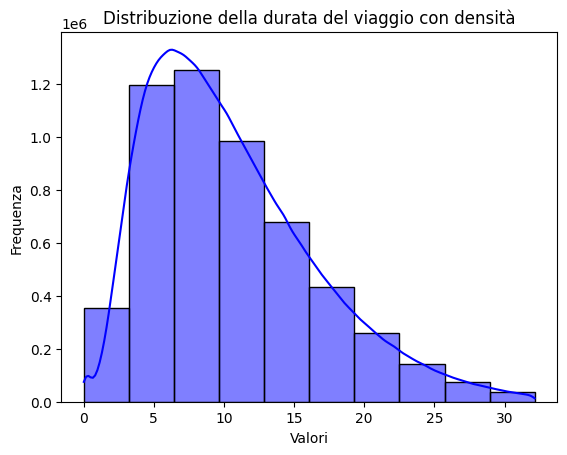

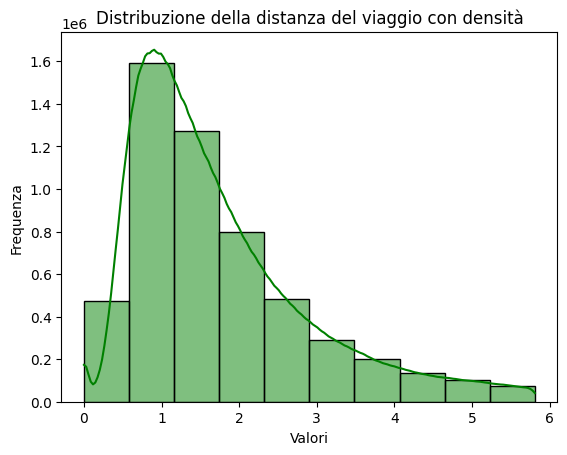

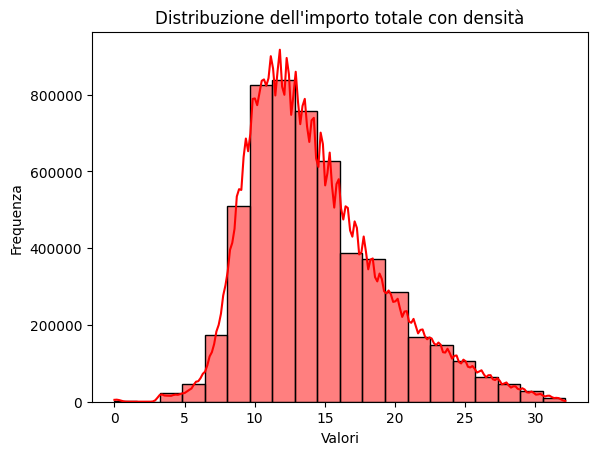

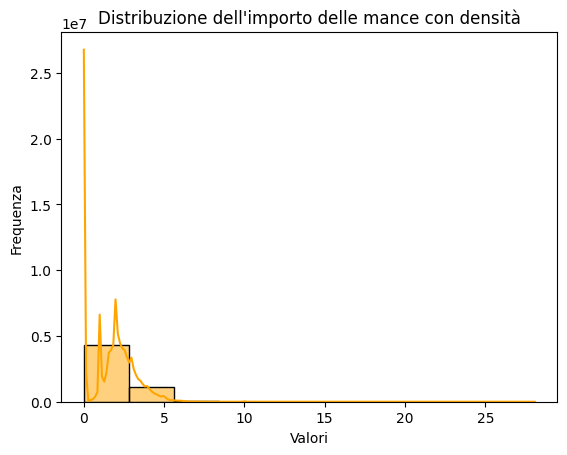

In [14]:
# Visualizziamo la distribuzione con seaborn
sns.histplot(taxi_df['trip_duration'], bins=10, kde=True, color='blue')
plt.title('Distribuzione della durata del viaggio con densità')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.show()

# Visualizziamo la distribuzione con seaborn
sns.histplot(taxi_df['trip_distance'], bins=10, kde=True, color='green')
plt.title('Distribuzione della distanza del viaggio con densità')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.show()

# Visualizziamo la distribuzione con seaborn
sns.histplot(taxi_df['total_amount'], bins=20, kde=True, color='red')
plt.title('Distribuzione dell\'importo totale con densità')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.show()

# Visualizziamo la distribuzione con seaborn
sns.histplot(taxi_df['tip_amount'], bins=10, kde=True, color='orange')
plt.title('Distribuzione dell\'importo delle mance con densità')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.show()

## Scatter 3D

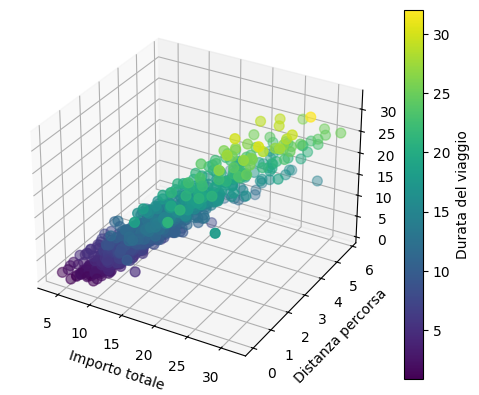

In [15]:
# Crea una figura e un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

taxi_df_sample = taxi_df.sample(1000)
# Crea lo scatterplot 3D
scatter = ax.scatter(taxi_df_sample['total_amount'], taxi_df_sample['trip_distance'], taxi_df_sample['trip_duration'], c=taxi_df_sample['trip_duration'], cmap='viridis', s=50)

# Aggiungi etichette agli assi
ax.set_xlabel('Importo totale')
ax.set_ylabel('Distanza percorsa')
ax.set_zlabel('Durata del viaggio')

# Aggiungi una barra del colore
fig.colorbar(scatter, ax=ax, label='Durata del viaggio')

# Mostra il grafico
plt.show()

## Scatterplot

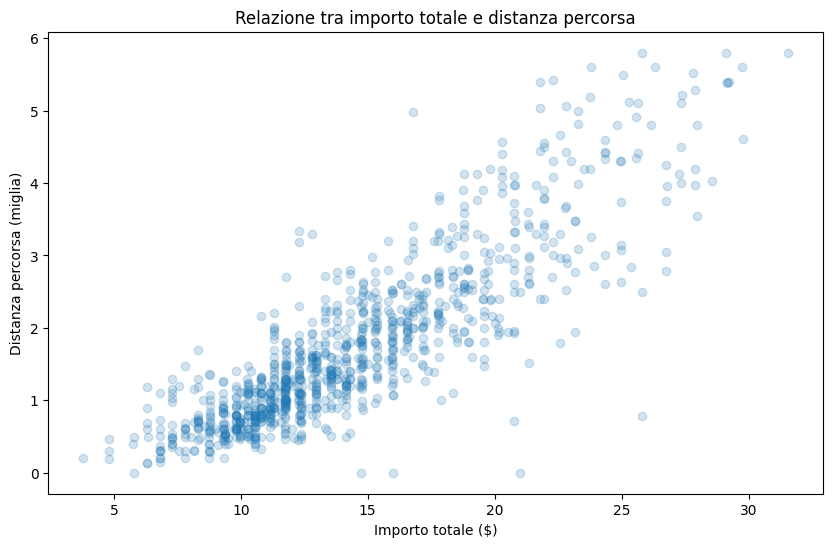

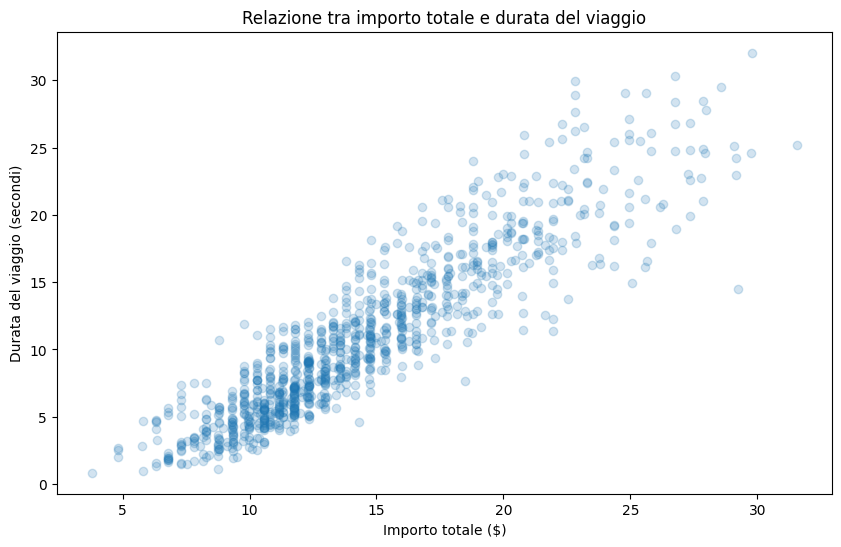

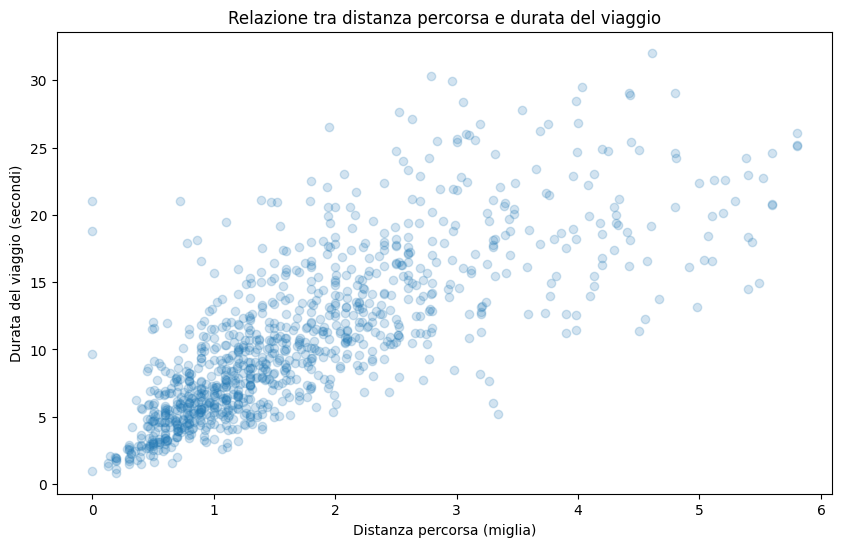

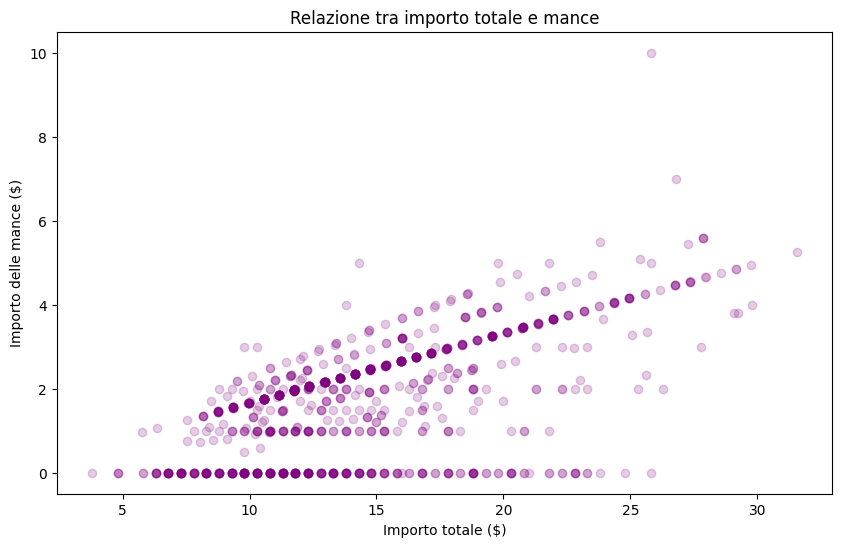

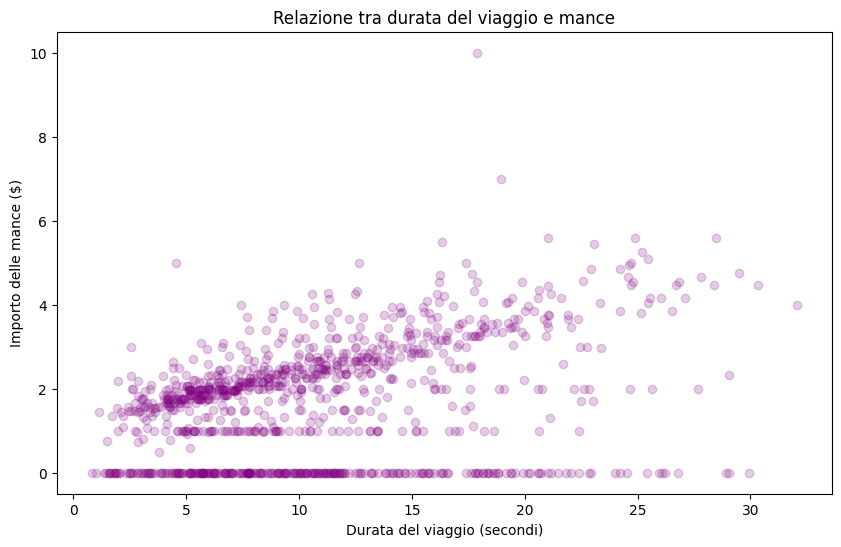

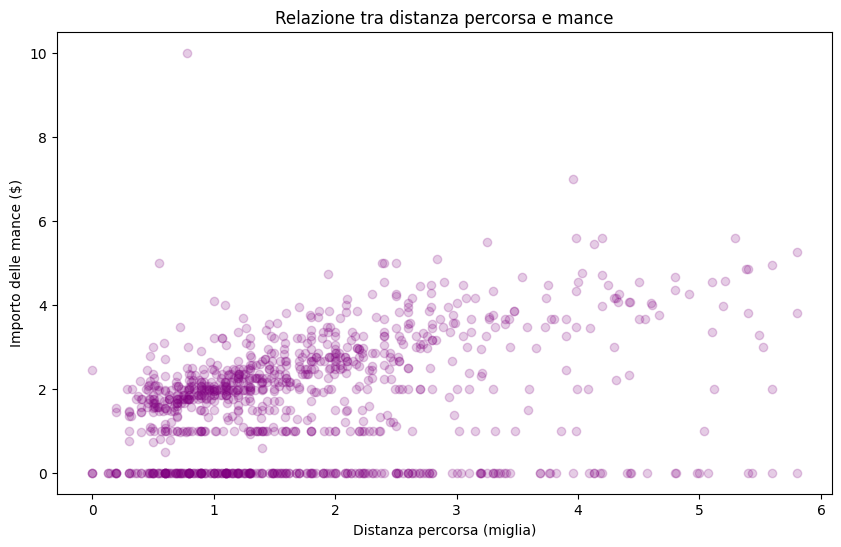

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['total_amount'], taxi_df_sample['trip_distance'], alpha=0.2)
plt.xlabel('Importo totale ($)')
plt.ylabel('Distanza percorsa (miglia)')
plt.title('Relazione tra importo totale e distanza percorsa')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['total_amount'], taxi_df_sample['trip_duration'], alpha=0.2)
plt.xlabel('Importo totale ($)')
plt.ylabel('Durata del viaggio (secondi)')
plt.title('Relazione tra importo totale e durata del viaggio')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['trip_distance'], taxi_df_sample['trip_duration'], alpha=0.2)
plt.xlabel('Distanza percorsa (miglia)')
plt.ylabel('Durata del viaggio (secondi)')
plt.title('Relazione tra distanza percorsa e durata del viaggio')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['total_amount'], taxi_df_sample['tip_amount'], alpha=0.2, color='purple')
plt.xlabel('Importo totale ($)')
plt.ylabel('Importo delle mance ($)')
plt.title('Relazione tra importo totale e mance')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['trip_duration'], taxi_df_sample['tip_amount'], alpha=0.2, color='purple')
plt.xlabel('Durata del viaggio (secondi)')
plt.ylabel('Importo delle mance ($)')
plt.title('Relazione tra durata del viaggio e mance')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(taxi_df_sample['trip_distance'], taxi_df_sample['tip_amount'], alpha=0.2, color='purple')
plt.xlabel('Distanza percorsa (miglia)')
plt.ylabel('Importo delle mance ($)')
plt.title('Relazione tra distanza percorsa e mance')
plt.show()


## Distribuzione dei Viaggi per Giorno della Settimana

C:\Users\marco\AppData\Local\Temp\ipykernel_748\4146900548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=taxi_df, x='Payment_name', palette='viridis', order=category_order)


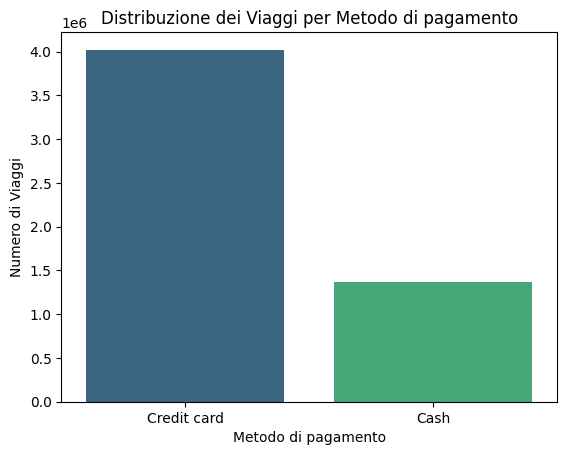

C:\Users\marco\AppData\Local\Temp\ipykernel_748\4146900548.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment_name', y='total_amount', data=taxi_df, palette='viridis', order=category_order)


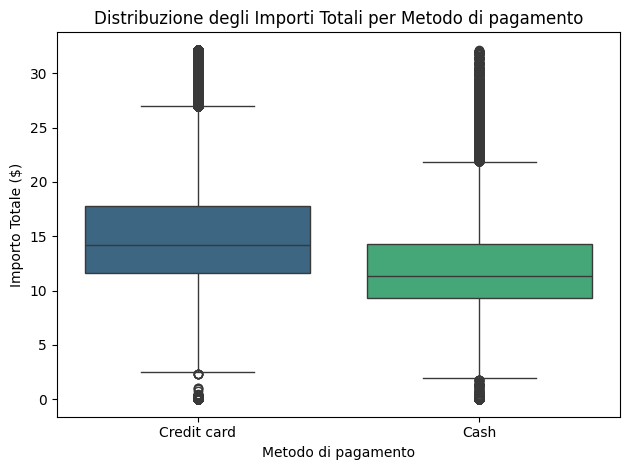

In [17]:
# Definiamo l'ordine delle categorie in base alla distribuzione
category_order = taxi_df['Payment_name'].value_counts().index

# Grafico 1: Countplot
sns.countplot(data=taxi_df, x='Payment_name', palette='viridis', order=category_order)
plt.title('Distribuzione dei Viaggi per Metodo di pagamento')
plt.xlabel('Metodo di pagamento')
plt.ylabel('Numero di Viaggi')
plt.show()

# Grafico 2: Boxplot
sns.boxplot(x='Payment_name', y='total_amount', data=taxi_df, palette='viridis', order=category_order)
plt.title('Distribuzione degli Importi Totali per Metodo di pagamento')
plt.xlabel('Metodo di pagamento')
plt.ylabel('Importo Totale ($)')

# Aggiustiamo il layout e mostriamo il grafico
plt.tight_layout()
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_748\3764938622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=taxi_df, x='day_of_week', palette='viridis', order=[


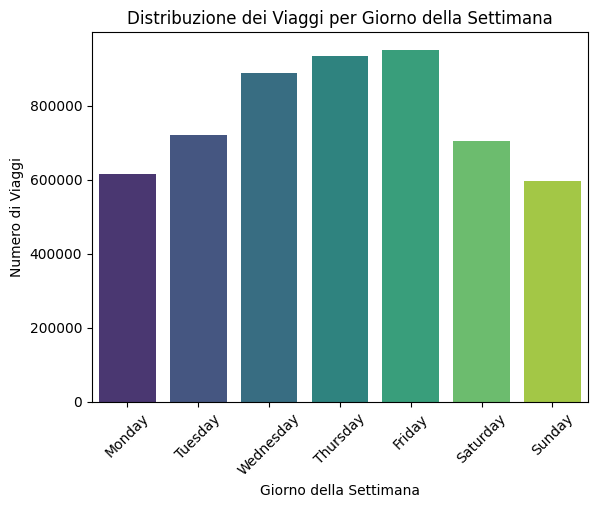

C:\Users\marco\AppData\Local\Temp\ipykernel_748\3764938622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='total_amount', data=taxi_df, palette='viridis',


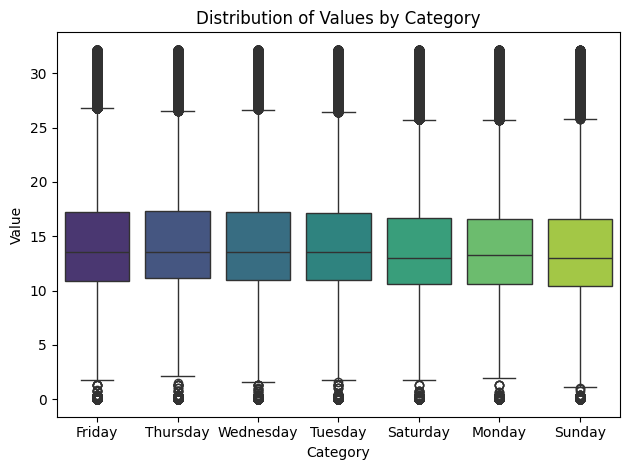

In [18]:
# Aggiunta della colonna 'day_of_week' derivata dalla data di pickup
taxi_df['day_of_week'] = pd.to_datetime(taxi_df['tpep_pickup_datetime']).dt.day_name()

# Grafico della distribuzione dei viaggi per giorno della settimana
sns.countplot(data=taxi_df, x='day_of_week', palette='viridis', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribuzione dei Viaggi per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Numero di Viaggi')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='day_of_week', y='total_amount', data=taxi_df, palette='viridis',
            order=taxi_df['day_of_week'].value_counts().index)
plt.title('Distribution of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Heatmap delle Zone più Frequenti

Index(['shape_area', 'objectid', 'shape_leng', 'location_id', 'zone',
       'borough', 'geometry'],
      dtype='object')


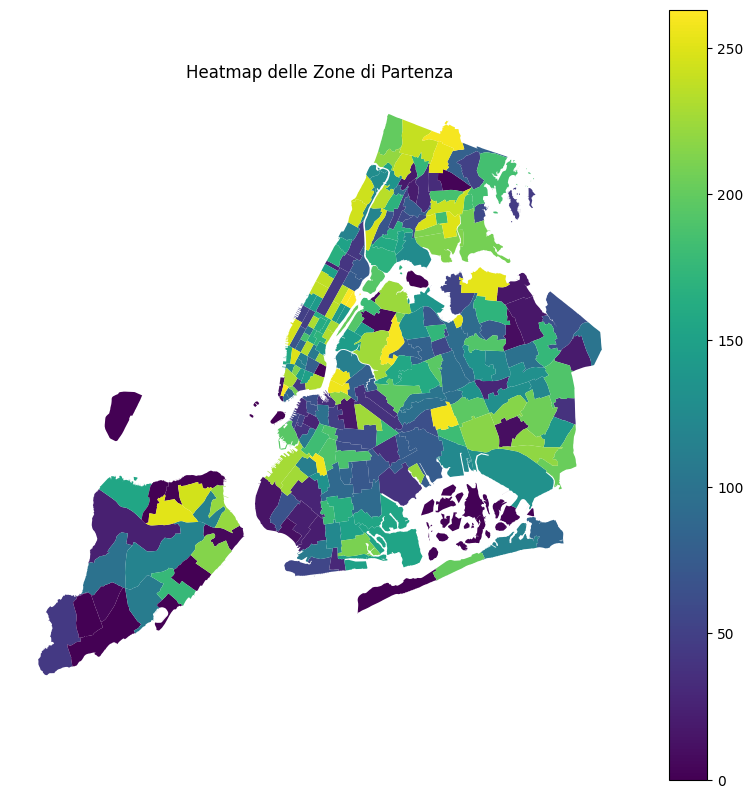

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Carica il GeoJSON
geojson_path = "NYC Taxi Zones.geojson"
taxi_zones = gpd.read_file(geojson_path)
print(taxi_zones.columns)

# Converti 'location_id' in int64
taxi_zones['location_id'] = taxi_zones['location_id'].astype(int)

# Calcola il conteggio per ID
pickup_counts = taxi_df['PULocationID'].value_counts().reset_index()

# Rinomina la colonna 'index' per il merge corretto
pickup_counts.rename(columns={'index': 'PULocationID'}, inplace=True)

# Unisci i conteggi al GeoDataFrame
pickup_heatmap = taxi_zones.merge(pickup_counts, left_on='location_id', right_on='PULocationID', how='left').fillna(0)

# Creazione della heatmap
fig, ax = plt.subplots(1, figsize=(10, 10))
pickup_heatmap.plot(column='PULocationID', cmap='viridis', legend=True, ax=ax)
ax.set_title('Heatmap delle Zone di Partenza')
ax.axis('off')
plt.show()

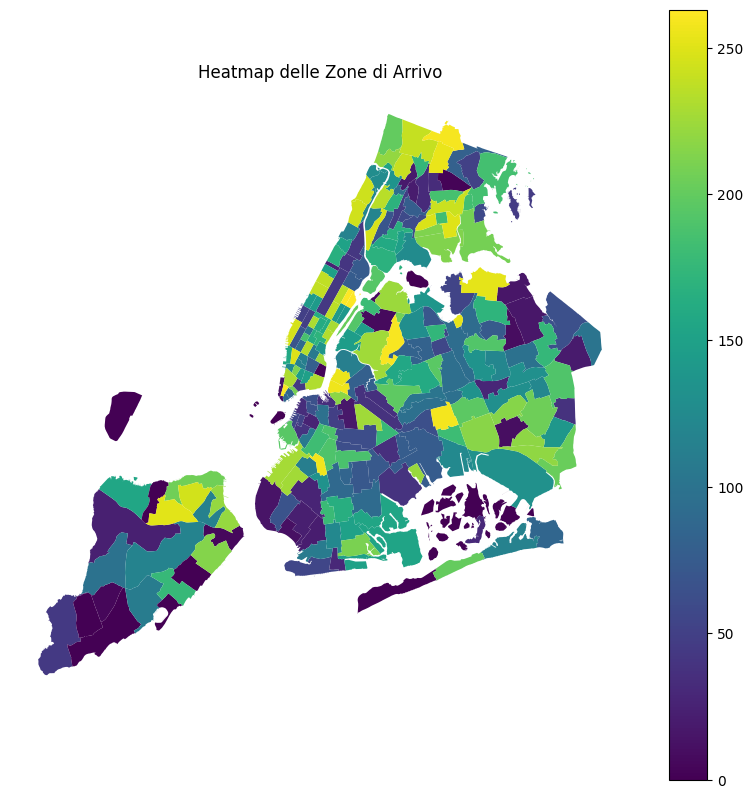

In [20]:

# Calcola il conteggio per ID
dropoff_counts = taxi_df['DOLocationID'].value_counts().reset_index()

# Rinomina la colonna 'index' per il merge corretto
dropoff_counts.rename(columns={'index': 'DOLocationID'}, inplace=True)

# Unisci i conteggi al GeoDataFrame
dropoff_heatmap = taxi_zones.merge(dropoff_counts, left_on='location_id', right_on='DOLocationID', how='left').fillna(0)

# Creazione della heatmap
fig, ax = plt.subplots(1, figsize=(10, 10))
dropoff_heatmap.plot(column='DOLocationID', cmap='viridis', legend=True, ax=ax)
ax.set_title('Heatmap delle Zone di Arrivo')
ax.axis('off')
plt.show()

La One hot encoding e la normalizzazione sono tecniche utilizzate nella data science per preparare i dati prima di applicare algoritmi di machine learning.

1. **One hot encoding**:
   - Serve a convertire variabili categoriali in un formato che può essere fornito agli algoritmi di machine learning per migliorare le prestazioni del modello.
   - Trasforma ogni categoria in una colonna binaria (0 o 1).
   - Esempio:
     - Variabile categoriale: ["rosso", "verde", "blu"]
     - One hot encoding:
       ```
       rosso  verde  blu
       1      0      0
       0      1      0
       0      0      1
       ```

2. **Normalizzazione**:
   - Serve a ridimensionare i valori numerici in un intervallo specifico, solitamente [0, 1] o [-1, 1].
   - Aiuta a migliorare la convergenza degli algoritmi di ottimizzazione e a evitare che le caratteristiche con scale diverse influenzino eccessivamente il modello.
   - Esempio:
     - Valori originali: [10, 20, 30]
     - Normalizzazione (min-max scaling): [0, 0.5, 1]

Queste tecniche sono fondamentali per garantire che i dati siano in un formato adeguato per l'analisi e la modellazione.2. **Normalizzazione**:
   - Serve a ridimensionare i valori numerici in un intervallo specifico, solitamente [0, 1] o [-1, 1].
   - Aiuta a migliorare la convergenza degli algoritmi di ottimizzazione e a evitare che le caratteristiche con scale diverse influenzino eccessivamente il modello.
   - Esempio:
     - Valori originali: [10, 20, 30]
     - Normalizzazione (min-max scaling): [0, 0.5, 1]

Queste tecniche sono fondamentali per garantire che i dati siano in un formato adeguato per l'analisi e la modellazione.



In [21]:
temp = pd.get_dummies(taxi_df, columns=['Payment_name', 'Ratecode_name', 'Vendor_name'])
print(temp.columns)

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_duration',
       'fare_per_mile', 'PickupLocationBorough', 'PickupLocationZone',
       'PickupLocationservice_zone', 'DropoffLocationBorough',
       'DropoffLocationZone', 'DropoffLocationservice_zone', 'day_of_week',
       'Payment_name_Cash', 'Payment_name_Credit card',
       'Ratecode_name_Group ride', 'Ratecode_name_JFK airport',
       'Ratecode_name_Nassau/Westchester', 'Ratecode_name_Negotiated fare',
       'Ratecode_name_Newark airport', 'Ratecode_name_Standard rate',
       'Ratecode_name_Unknown', 'Vendor_name_Creative Mobile Tecnologics',
       'Vendor_name_Verifone'],
      dtype='object')


In [22]:
numeric_features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'trip_duration', 'fare_per_mile']
scaler = MinMaxScaler()

taxi_df_scaled = scaler.fit_transform(taxi_df[numeric_features])
taxi_df_scaled = pd.DataFrame(taxi_df_scaled, columns=numeric_features)
taxi_df_scaled.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,trip_duration,fare_per_mile
0,0.0,0.206540,0.188620,0.222222,0.151515,0.052350,0.0,1.0,0.909091,0.350544,0.148859,0.003001
1,0.0,0.206540,0.220057,0.222222,0.151515,0.053419,0.0,1.0,0.909091,0.382582,0.230290,0.003275
2,0.0,0.103270,0.188620,0.222222,0.151515,0.035613,0.0,1.0,0.909091,0.335925,0.191909,0.005751
3,0.0,0.137694,0.172902,0.037037,0.151515,0.048433,0.0,1.0,0.000000,0.253810,0.150415,0.003259
4,0.0,0.000000,0.110028,0.037037,0.151515,0.000000,0.0,1.0,0.000000,0.149300,0.071058,0.000000


## Matrice di Correlazione

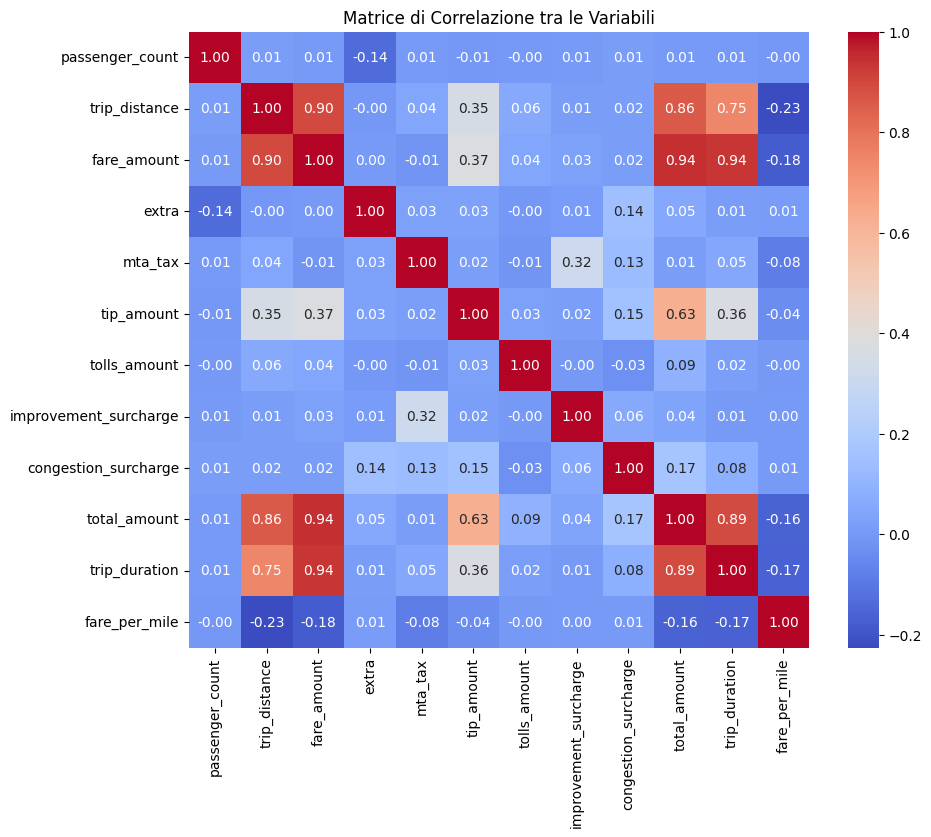

In [23]:
# Calcola la matrice di correlazione
#correlation_matrix = df_clean[['trip_distance', 'trip_duration', 'fare_amount', 'total_amount', 'tip_amount']].corr()
correlation_matrix = taxi_df[['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount','trip_duration','fare_per_mile']].corr()

# Visualizza la matrice di correlazione come una heatmap per interpretare meglio i risultati
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione tra le Variabili')
plt.show()